# Module 2 Summative Lab

## Introduction

For today's section, we're going to work on a single big lab to apply everything we've learned in Module 2!

## About This Lab

A quick note before getting started--this lab isn't like other labs you seen so far. This lab is meant to take ~8 hours to complete, so it's much longer and more challenging that the average labs you've seen so far. If you feel like this lab is challenging or that you might be struggling a bit, don't fret--that's by design! With everything we've learned about Web Scraping, APIs, and Databases, the best way to test our knowledge of it is to build something substantial! 

## The Project

In this lab, we're going to make use of everything we've learned about APIs, databases, and Object-Oriented Programming to **_Extract, Transform, and Load_** (or **_ETL_**, for short) some data from a SQL database into a MongoDB Database. 

You'll find a database containing information about soccer teams and the matches they've played in the file `database.sqlite`. For this project, our goal is to get the data we think is important from this SQL database, do some calculations and data transformation, and then store everything in a MongoDB database. 

Let's get into the specifics of this project.

### The Goal

Start by examining the data dictionary for the SQL database we'll be working with, which comes from this [kaggle page](https://www.kaggle.com/laudanum/footballdelphi).  Familiarize yourself with the tables it contains, and what each column means. We'll be using this database to get data on each soccer team, calculate some summary statistics, and then store each in a MongoDB database. 

Upon completion of this lab, each unique team in this dataset should have a record in the MongoDB instance containing the following information:

* The name of the team
* The total number of goals scored by the team during the 2011 season
* The total number of wins the team earned during the 2011 season
* A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly)
* The team's win percentage on days where it was raining during games in the 2011 season. 

#### Getting the Weather Data

Note that for this last calculation, you'll need to figure out if it was raining or not during the game. The database itself does not contain this information, but it does contain the date on which the game was played. For this, you'll need to use the [DarkSky API](https://darksky.net/dev) to get the historical weather data for that day. Note that each game is played in a different location, and this information is not contained in our SQL database. However, the teams in this database are largely german, so go ahead and just use the weather in Berlin, Germany as a proxy for this information. If it was raining in Berlin on the day the game was played, count that as rain game--**_you do not need to try and figure out the actual weather at each game's location, because we don't have that information!_**

#### NOTE: The DarkSky API is limited to 1000 free API calls a day, so be sure to test your model on very small samples. Otherwise, you'll hit the rate limit!

## Project Architecture

Unlike previous labs, this lab is more open-ended, and will require you to make design decisions and plan out your strategy for building a system with this many working parts. However, **_using Object-Oriented Programming is a requirement for this project--you must create at least 2 separate, well structured classes in your solution!_** Although it may seem easier to "just start coding", this is a classic beginner's mistake. Instead, think about separating out the different functionalities you'll need to reach your goal, and then build classes to handle each. For instance, at minimum, you'll need to:

* Query the SQL database
* Calculate summary statistics
* Get the weather data from the DarkSky API
* Load the data into MongoDB

We **_strongly recommend_** you consider creating separate classes for handling at least some of these of these tasks.  Be sure to plan the inputs, outputs, and methods for each class before you begin coding! 

**_NOTE:_** We have provided some empty classes below. You are welcome to delete them and use a different architecture for this project if you so choose.  You do not have to use each of them, they are just there to give you an idea of what you could sorts of classes you may want to consider using.

### Rapid Prototyping and Refactoring

It's totally okay to try to get a task working without using OOP. For instance, when experimenting with the DarkSky API for getting historical weather data, it makes sense to just write the code in the cells and rapidly iterate until you get it all working. However, once you get it working, you're not done--you should then **_Refactor_** your code into functions or classes to make your code more modular, reusable, understandable, and maintainable! 

In short--do what you need to do to get each separate piece of functionality working, and then refactor it into a class after you've figured it out!

### Some Final Advice

You haven't built anything this big or complex thus far, so you may not yet fully realize how much trial and error goes into it. If your code keeps breaking, resist the urge to get frustrated, and just keep working. Software development is an iterative process!  No one writes perfect code that works the first time for something this involved. You're going to run into _a lot_ of small errors in this project, right up until the point where it just works, and then you're done! However, you can reduce these errors by planning out your code, and thinking about how all of the pieces fit together before you begin coding. Once you have some basic understanding of how it all will work, then you'll know what you need to build, and then all that is left is to build it!

In short:

* Plan ahead--you'll thank yourself later!
* Errors and broken code aren't bad, they're normal. 
* Keep working, and stay confident--you can do this!

Good luck--we look forward to seeing your completed project!

## Project Workflow

	1. load soccer data into Python
		a. explore the data
		b. import to Pandas as different DataFrames?
		c. transform data as necessary to make it more directly useable (probably also drop a lot of columns
	2. Build a class for team info
		a. write functions that will aggregate wins, losses, goals per game (and thus goals per season)
		b. write a function that will produce a win-loss histogram (and store the visualization directly!)
	3. Build a class for gathering weather data
		a. functions to automate pulling weather data for every game day
	4. Build a class or function that will calculate win percentage for rainy days
		a. needs each team to access weather data for each game day and then calculate win percentage of rainy days
	5. Build a class for pushing all of this stuff to MongoDB
		a. ______

## Loading Soccer Data


In [1]:
# for viewing/visualizing data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#for web scraping
from bs4 import BeautifulSoup
import requests
import re

#for interacting with MongoDB
import pymongo

#image handling libraries
from io import StringIO, BytesIO
from PIL import Image

#for handling SQL database & loading our soccer database
import sqlite3
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

In [2]:
#exploring structure of our data
c.execute("""SELECT * FROM Matches
          WHERE Season = 2011
          ;"""
         )
matches_df = pd.DataFrame(c.fetchall())
matches_df.columns = [i[0] for i in c.description]
display(matches_df.head(5))
matches_df.info()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 9 columns):
Match_ID    992 non-null int64
Div         992 non-null object
Season      992 non-null int64
Date        992 non-null object
HomeTeam    992 non-null object
AwayTeam    992 non-null object
FTHG        992 non-null int64
FTAG        992 non-null int64
FTR         992 non-null object
dtypes: int64(4), object(5)
memory usage: 69.8+ KB


# Building classes for Teams

In [3]:
#The name of the team
#The total number of goals scored by the team during the 2011 season
#The total number of wins the team earned during the 2011 season
#A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly)
#The team's win percentage on days where it was raining during games in the 2011 season.

class Team:
    
    def __init__(self, name=None):
        self.name = name
        self.total_goals()
        self.date_outcomes()
        
        
    def total_goals(self):
        home_goals = c.execute("SELECT Sum(FTHG) FROM Matches WHERE Season = 2011 AND HomeTeam=:name", {"name": self.name}).fetchall()[0][0]
        away_goals = c.execute("SELECT Sum(FTAG) FROM Matches WHERE Season = 2011 AND AwayTeam=:name", {"name": self.name}).fetchall()[0][0]
        self.tot_goals = home_goals + away_goals
        return self.tot_goals

    
    def date_outcomes(self):
        self.tot_wins = 0
        self.tot_losses = 0
        self.tot_draws = 0
        games_played = c.execute("SELECT Date, FTR, HomeTeam, AwayTeam  FROM Matches WHERE Season=2011 AND ( HomeTeam=:name OR AwayTeam=:name )", {"name": self.name}).fetchall()
        self.date_outc = []
        for element in games_played:
            win_loss_draw = ''
            #if home team
            if element[2] == self.name:
                #if win
                if element[1] == 'H':
                    win_loss_draw = 'W'
                elif element[1] == 'A':
                    win_loss_draw = 'L'
                else:
                    win_loss_draw = 'D'
            #else if away team
            else:
                #if loss
                if element[1] == 'A':
                    win_loss_draw = 'W'
                elif element[1] == 'H':
                    win_loss_draw = 'L'
                else:
                    win_loss_draw = 'D'
            self.date_outc.append([element[0],win_loss_draw])
        for date in self.date_outc:
            if date[1] == 'W':
                self.tot_wins += 1
            elif date[1] == 'L':
                self.tot_losses += 1
            else:
                self.tot_draws += 1
        return self.date_outc
    
    
    def winloss_histogram(self):
        plt.clf()
        wins = self.tot_wins
        losses = self.tot_losses
        draws = self.tot_draws
        plt.bar(['wins','losses','draws'], [wins, losses, draws])
        plt.title(self.name)   
        plt.savefig('plots/{}.png'.format(self.name))
        
    
    def win_rate_raining(self, weather_dates):
        win_count_raining = 0
        raining_days_count = 0
        for date in self.date_outc:
            date.append(weather_dates[date[0]])
            if date[2] != 'None':
                raining_days_count += 1
                if date[1] == 'W':
                    win_count_raining += 1
        self.rain_win_rate = win_count_raining / raining_days_count
        return self.rain_win_rate
    
    def to_dict(self):
        team_dict = {}
        team_dict['name'] = self.name
        team_dict['2011 total goals'] = self.tot_goals
        team_dict['2011 total losses'] = self.tot_losses
        team_dict['2011 total draws'] = self.tot_draws
        team_dict['2011 total wins'] = self.tot_wins
        team_dict['rainy day win rate'] = self.rain_win_rate
        with open('plots/{}.png'.format(self.name), 'rb') as f:
             image = f.read()
        team_dict['2011 histogram'] = image
        return team_dict

FileNotFoundError: [Errno 2] No such file or directory: 'plots/Bayern Munich.png'

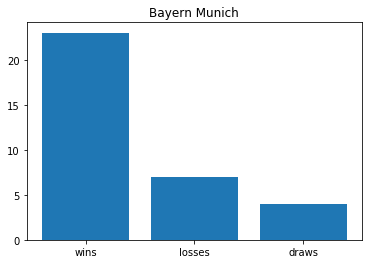

In [4]:
BM_team = Team('Bayern Munich')
BM_team.winloss_histogram()

## WEATHER 

In [ ]:
# Dark Sky:

# KEY efc977ecdc97dfccb2554a30b9fcd3b6

# https://api.darksky.net/forecast/[key]/[latitude],[longitude],[time]

# time: [YYYY]-[MM]-[DD]T[HH]:[MM]:[SS]

# key = 'dadd754b659ad0dbeadda5eb44a7d5fa'
# base_url = 'https://api.darksky.net/forecast/'
# latitude = '52.512086'
# longitude = '13.405709'
# date = '2011-03-01T12:00:00'

# full_url = base_url + key + '/' + latitude + ',' + longitude + ',' + date

In [ ]:
# You don't have to use these classes, but we recommend them as a good place to start!
class WeatherGetter():
    
    def __init__(self, lat='', long=''):
        self.key = 'dadd754b659ad0dbeadda5eb44a7d5fa'
        self.base_url = 'https://api.darksky.net/forecast/'
        self.latitude = lat
        self.longitude = long
        
        
    def get_precipType(self, date):
        full_url = self.base_url + self.key + '/' + self.latitude + ',' + self.longitude + ',' + date + 'T12:00:00?exclude=hourly'
        resp = requests.get(full_url)
        try:
            precipType = resp.json()['daily']['data'][0]['precipType']
        except:
            precipType = 'None'
        return (date, precipType)

In [ ]:
def dates_location_weather(lat, long, season):
    """
    This wonderfully named function takes a location in lat, long and also the year of the soccer season.
    It queries the dates that matches were played and returns a list of tuples containing the date and type of
    precipitation on that day.
    """
    #Query dates that matches were played
    season_dates = c.execute("SELECT Distinct Date FROM Matches WHERE Season=:year ORDER BY Date", {'year':season}).fetchall()
    #Create weather getter object for the specified location
    location_weather_getter = WeatherGetter(lat,long)
    #create a list that will contain our dates and precip type
    date_weather = {}
    for date in season_dates:
        result = location_weather_getter.get_precipType(date[0])
        date_weather[result[0]] = result[1]
    #return populated dictionary
    return date_weather

In [ ]:
berlin_weather_2011 = dates_location_weather('52.512086', '13.405709', 2011)
berlin_weather_2011[:10]

## Iterating making team instances

In [ ]:
def team_stats_maker(year, weather_for_place_in_season):
    #Get list of team names
    team_names = c.execute("SELECT Distinct HomeTeam FROM Matches WHERE Season=:year", {"year": year}).fetchall()
    team_names = [name[0] for name in team_names]
    
    #Create Team objects
    teams = []
    for name in team_names:
        #create Team object and run functions
        team = Team(name)
        team.win_rate_raining(weather_for_place_in_season)
        team.winloss_histogram()
        teams.append(team)
    return teams

In [ ]:
teams_2011 = team_stats_maker(2011, berlin_weather_2011)

In [ ]:
teams_2011[0].tot_wins

# MongoDB

**Make sure your MongoDB server is running before executing the cells below!**

In [ ]:
def push_to_mongo(teams, mongo_client):
    #Connect to Mongo Client
    myclient = pymongo.MongoClient(mongo_client)
    mydb = myclient['Teams_DB']
    mycollection = mydb['2011_Teams']
    for team in teams:
        mycollection.insert_one(team.todict())
    pass

In [ ]:
push_to_mongo(teams_2011, "mongodb://127.0.0.1:27017/")

#### LEVEL-UP
Make a function that returns the stats and histogram for the team of your choosing.

In [ ]:
def get_team_stats(team_name):
    team_stats = list(mycollection.find({'name': team_name},{'_id': 0, '2011 histogram': 0}))
    team_hist = list(mycollection.find({'name': team_name}))[0]['2011 histogram']
    display(Image.open(BytesIO(team_hist)))
    for i in range(len(team_stats.keys())):
        if 
        
        print(team_stats)
    return team_stats

In [ ]:
get_team_stats('Bayern Munich')

In [ ]:
testdict = {'alpha': 'a', 'beta': 'b', 'gamma': 'c'}
testdict.keys()

# Summary

In this lab, we dug deep and used everything we've learned so far about python programming, databases, HTTP requests and API calls to ETL data from a SQL database into a MongoDB instance!